## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    Ziyang Huang

**Student ID:**     1067800

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = './yoga32'
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

In [2]:
cnn1 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.MaxPooling2D((2, 2), padding='valid', strides=(2,2)),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.MaxPooling2D((2, 2), padding='valid', strides=(2,2)),
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ], 
)

In [3]:
cnn1.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [4]:
history_cnn1 = cnn1.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
 8/13 [=================>............] - ETA: 0s - loss: 21.5139 - accuracy: 0.1172

2022-09-06 17:45:40.999913: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 0s 13ms/step - loss: 16.0267 - accuracy: 0.1250 - val_loss: 4.6605 - val_accuracy: 0.1538
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 3.7673 - accuracy: 0.1587 - val_loss: 2.9661 - val_accuracy: 0.1827
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 2.6412 - accuracy: 0.2043 - val_loss: 2.5521 - val_accuracy: 0.2019
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 2.2206 - accuracy: 0.2308 - val_loss: 2.4784 - val_accuracy: 0.2308
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 1.9663 - accuracy: 0.3005 - val_loss: 2.4483 - val_accuracy: 0.2212
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 1.7411 - accuracy: 0.3630 - val_loss: 2.4123 - val_accuracy: 0.2308
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 1.5221 - accuracy: 0.4760 - val_loss: 2.4073 - val_accuracy: 0.2596
Epoch 8/50
13/13 [==========

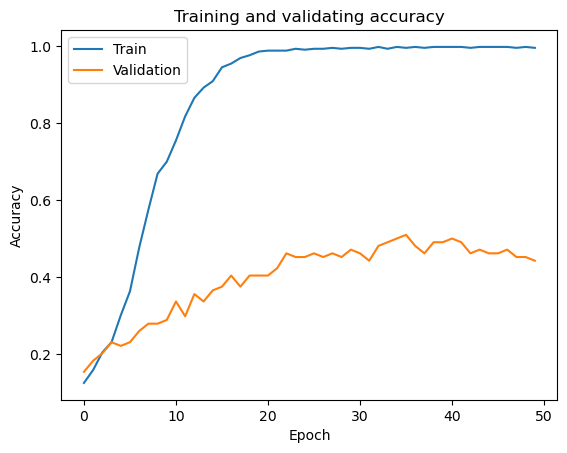

In [5]:
plt.plot(history_cnn1.history['accuracy'], label='Train')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

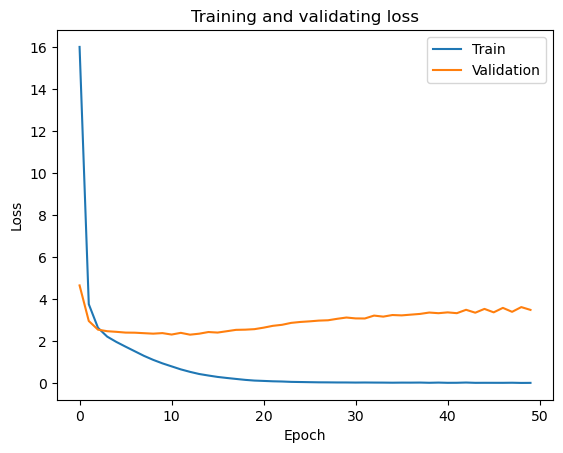

In [6]:
plt.plot(history_cnn1.history['loss'], label='Train')
plt.plot(history_cnn1.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

In [186]:
# perform data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
#     layers.RandomContrast(0.1),
    layers.RandomCrop(28,28),
    layers.RandomZoom((-0.3,0.3))
])

cnn2 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        layers.Rescaling(1./255, input_shape=(32,32,3)), # normalization
        data_augmentation,
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid', strides=(1,1)),
        layers.MaxPooling2D((2, 2), padding='valid', strides=(2,2)),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid', strides=(1,1),kernel_regularizer='L2'),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid', strides=(1,1),kernel_regularizer='L2'),
        layers.MaxPooling2D((2, 2), padding='valid', strides=(2,2)),
        
        layers.Flatten(),
        layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l1_l2(0.01))
    ], 
)

In [187]:
cnn2.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [188]:
history_cnn2 = cnn2.fit(train_data, validation_data=val_data, epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 17ms/step - loss: 4.9597 - accuracy: 0.1130 - val_loss: 4.6360 - val_accuracy: 0.0962
Epoch 2/300
13/13 [==============================] - 0s 12ms/step - loss: 4.3819 - accuracy: 0.1178 - val_loss: 4.1142 - val_accuracy: 0.1154
Epoch 3/300
13/13 [==============================] - 0s 11ms/step - loss: 3.8949 - accuracy: 0.1226 - val_loss: 3.6723 - val_accuracy: 0.1154
Epoch 4/300
13/13 [==============================] - 0s 11ms/step - loss: 3.4883 - accuracy: 0.1154 - val_loss: 3.3130 - val_accuracy: 0.0865
Epoch 5/300
13/13 [==============================] - 0s 11ms/step - loss: 3.1568 - accuracy: 0.1370 - val_loss: 3.0202 - val_accuracy: 0.0673
Epoch 6/300
13/13 [==============================] - 0s 11ms/step - loss: 2.8916 - accuracy: 0.1130 - val_loss: 2.7884 - val_accuracy: 0.0673
Epoch 7/300
13/13 [==============================] - 0s 11ms/step - loss: 2.6858 - accuracy: 0.1130 - val_loss: 2.6136 - val_accuracy: 0.0673
Epoch 

13/13 [==============================] - 0s 11ms/step - loss: 1.7331 - accuracy: 0.4279 - val_loss: 1.8554 - val_accuracy: 0.4519
Epoch 59/300
13/13 [==============================] - 0s 9ms/step - loss: 1.7989 - accuracy: 0.4111 - val_loss: 1.8674 - val_accuracy: 0.4519
Epoch 60/300
13/13 [==============================] - 0s 10ms/step - loss: 1.7825 - accuracy: 0.4014 - val_loss: 1.8152 - val_accuracy: 0.4712
Epoch 61/300
13/13 [==============================] - 0s 11ms/step - loss: 1.7708 - accuracy: 0.4399 - val_loss: 1.9039 - val_accuracy: 0.4231
Epoch 62/300
13/13 [==============================] - 0s 11ms/step - loss: 1.7774 - accuracy: 0.4351 - val_loss: 1.8784 - val_accuracy: 0.4135
Epoch 63/300
13/13 [==============================] - 0s 10ms/step - loss: 1.7790 - accuracy: 0.4038 - val_loss: 1.8996 - val_accuracy: 0.3846
Epoch 64/300
13/13 [==============================] - 0s 10ms/step - loss: 1.7559 - accuracy: 0.4399 - val_loss: 1.9271 - val_accuracy: 0.3365
Epoch 65/300


13/13 [==============================] - 0s 10ms/step - loss: 1.5395 - accuracy: 0.5096 - val_loss: 1.6715 - val_accuracy: 0.5000
Epoch 116/300
13/13 [==============================] - 0s 11ms/step - loss: 1.4805 - accuracy: 0.5312 - val_loss: 1.7958 - val_accuracy: 0.5000
Epoch 117/300
13/13 [==============================] - 0s 11ms/step - loss: 1.5755 - accuracy: 0.5168 - val_loss: 1.6695 - val_accuracy: 0.5000
Epoch 118/300
13/13 [==============================] - 0s 10ms/step - loss: 1.5346 - accuracy: 0.5144 - val_loss: 1.6137 - val_accuracy: 0.5481
Epoch 119/300
13/13 [==============================] - 0s 10ms/step - loss: 1.4535 - accuracy: 0.5553 - val_loss: 1.6178 - val_accuracy: 0.5385
Epoch 120/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3986 - accuracy: 0.5865 - val_loss: 1.6217 - val_accuracy: 0.5385
Epoch 121/300
13/13 [==============================] - 0s 11ms/step - loss: 1.4448 - accuracy: 0.5649 - val_loss: 1.6468 - val_accuracy: 0.5192
Epoch 

Epoch 172/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3544 - accuracy: 0.5889 - val_loss: 1.6146 - val_accuracy: 0.5673
Epoch 173/300
13/13 [==============================] - 0s 11ms/step - loss: 1.4067 - accuracy: 0.5721 - val_loss: 1.5470 - val_accuracy: 0.5673
Epoch 174/300
13/13 [==============================] - 0s 10ms/step - loss: 1.4344 - accuracy: 0.5457 - val_loss: 1.5371 - val_accuracy: 0.5577
Epoch 175/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3515 - accuracy: 0.5793 - val_loss: 1.5505 - val_accuracy: 0.5769
Epoch 176/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3223 - accuracy: 0.6106 - val_loss: 1.5257 - val_accuracy: 0.5962
Epoch 177/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3672 - accuracy: 0.6034 - val_loss: 1.5791 - val_accuracy: 0.5673
Epoch 178/300
13/13 [==============================] - 0s 11ms/step - loss: 1.4792 - accuracy: 0.5601 - val_loss: 1.5806 - val_accuracy:

Epoch 229/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3536 - accuracy: 0.6130 - val_loss: 1.4897 - val_accuracy: 0.6058
Epoch 230/300
13/13 [==============================] - 0s 11ms/step - loss: 1.2698 - accuracy: 0.6274 - val_loss: 1.5557 - val_accuracy: 0.5673
Epoch 231/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3683 - accuracy: 0.5865 - val_loss: 1.5129 - val_accuracy: 0.5673
Epoch 232/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3828 - accuracy: 0.5649 - val_loss: 1.4673 - val_accuracy: 0.5673
Epoch 233/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3299 - accuracy: 0.5817 - val_loss: 1.5573 - val_accuracy: 0.5962
Epoch 234/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3792 - accuracy: 0.5962 - val_loss: 1.5889 - val_accuracy: 0.5481
Epoch 235/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3598 - accuracy: 0.5962 - val_loss: 1.4953 - val_accuracy:

Epoch 286/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3169 - accuracy: 0.5986 - val_loss: 1.5077 - val_accuracy: 0.5577
Epoch 287/300
13/13 [==============================] - 0s 9ms/step - loss: 1.3601 - accuracy: 0.5865 - val_loss: 1.4974 - val_accuracy: 0.5962
Epoch 288/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3125 - accuracy: 0.6034 - val_loss: 1.5314 - val_accuracy: 0.5962
Epoch 289/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3278 - accuracy: 0.6010 - val_loss: 1.5462 - val_accuracy: 0.6058
Epoch 290/300
13/13 [==============================] - 0s 11ms/step - loss: 1.3125 - accuracy: 0.6058 - val_loss: 1.5448 - val_accuracy: 0.6058
Epoch 291/300
13/13 [==============================] - 0s 10ms/step - loss: 1.4376 - accuracy: 0.5505 - val_loss: 1.4684 - val_accuracy: 0.5962
Epoch 292/300
13/13 [==============================] - 0s 10ms/step - loss: 1.3505 - accuracy: 0.6058 - val_loss: 1.5488 - val_accuracy: 

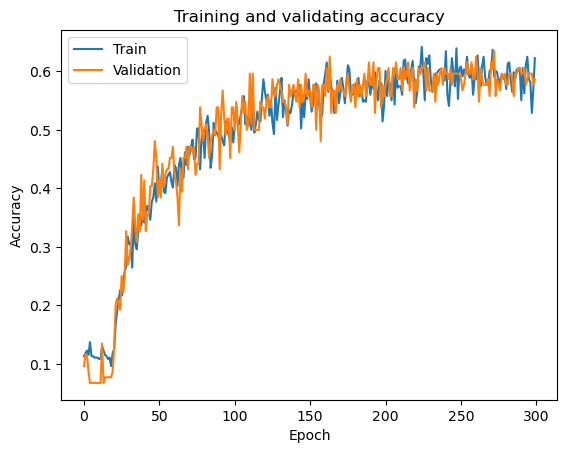

In [189]:
plt.plot(history_cnn2.history['accuracy'], label='Train')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

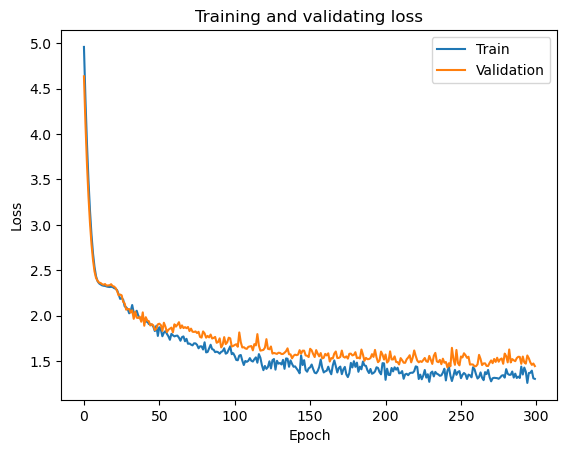

In [190]:
plt.plot(history_cnn2.history['loss'], label='Train')
plt.plot(history_cnn2.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [191]:
from sklearn.metrics import confusion_matrix

# Get test images from 'test' directory
test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=1)

# split label and data
x_test, y_test = tuple(zip(*test_data))

# predict using x_test
y_pred = np.argmax(cnn2.predict(np.vstack(x_test)), axis=1)

# use confusion matrix to calculate the accuracies for each class 
matrix = confusion_matrix(y_test, y_pred)
accuracies = matrix.diagonal()/matrix.sum(axis=1)
overall_accuracy = sum(accuracies)/10
print(f"The overall classification accuracy is {overall_accuracy}")

for i in range(len(class_names)):
    print(f"{class_names[i]} accuracy is {accuracies[i]}")

Found 70 files belonging to 10 classes.
3/3 [==============================] - 0s 3ms/step
The overall classification accuracy is 0.5857142857142856
bridge accuracy is 0.5714285714285714
childs accuracy is 0.5714285714285714
downwarddog accuracy is 0.7142857142857143
mountain accuracy is 0.8571428571428571
plank accuracy is 0.42857142857142855
seatedforwardbend accuracy is 0.2857142857142857
tree accuracy is 0.2857142857142857
trianglepose accuracy is 0.7142857142857143
warrior1 accuracy is 0.5714285714285714
warrior2 accuracy is 0.8571428571428571


### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [192]:
# load data
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=1)

test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=1)

# split data and label and extract the model
x_train, y_train = tuple(zip(*train_data))
x_test, y_test = tuple(zip(*test_data))
model = Model(inputs=cnn2.input, outputs=cnn2.layers[-2].output)

Found 520 files belonging to 10 classes.
Found 70 files belonging to 10 classes.


In [193]:
# get the feature space of all training data
train_feature = []

for i in range(len(train_data)):
    train_feature.append(model.predict(x_train[i]))

1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


In [194]:
# get the feature space of all testing data
test_feature = []

for i in range(len(test_data)):
    test_feature.append(model.predict(x_test[i]))

1/1 [==============================] - 0s 7ms/step


In [195]:
# calculate the Euclidean distance between test feature and train feature
distance = []
for i in range(len(test_feature)):
    temp = []
    for j in range(len(train_feature)):
        dist = np.linalg.norm(test_feature[i]-train_feature[j])
        temp.append((dist,j))
    distance.append(temp)


In [196]:
# get the index of the 5 nearest neighbours
result = []
for i in range(len(distance)):
    s = sorted(distance[i], key = lambda x: x[0])[:5]
    temp = [tup[1] for tup in s]
    result.append(temp)

/var/folders/jw/bxqd4v1n6lvf2lzb2mgh84v00000gn/T/ipykernel_44002/1670151331.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(figsize=(18, 18))


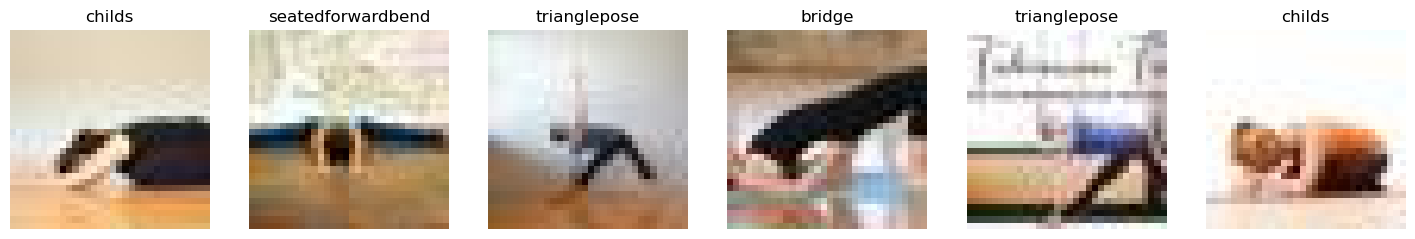

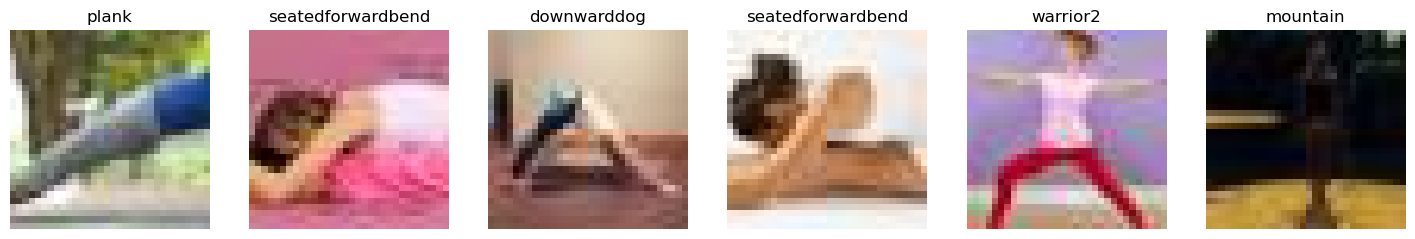

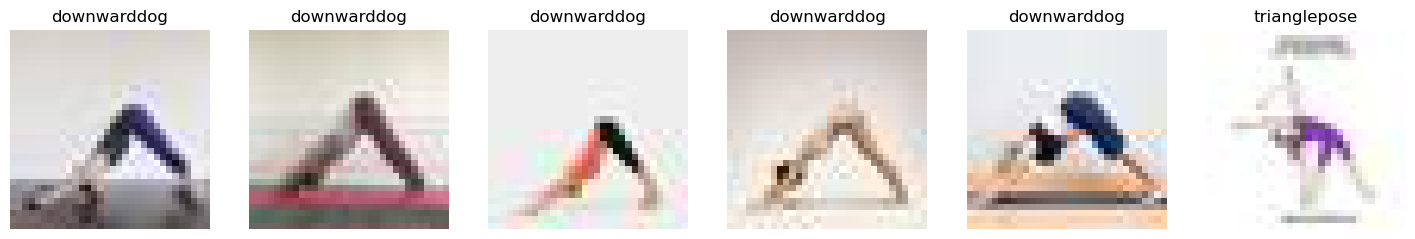

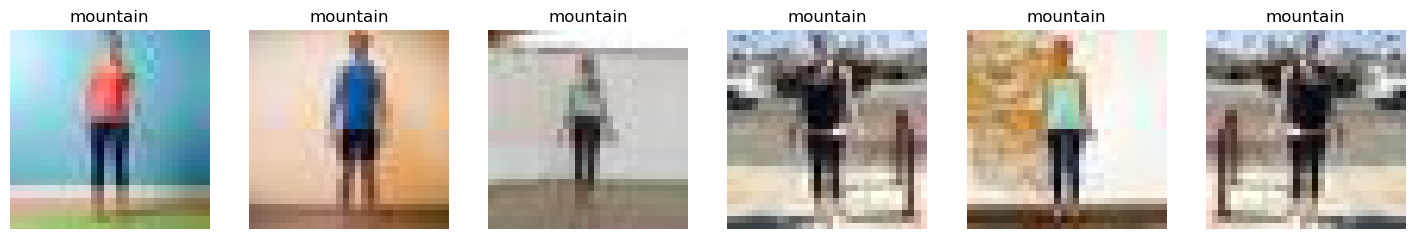

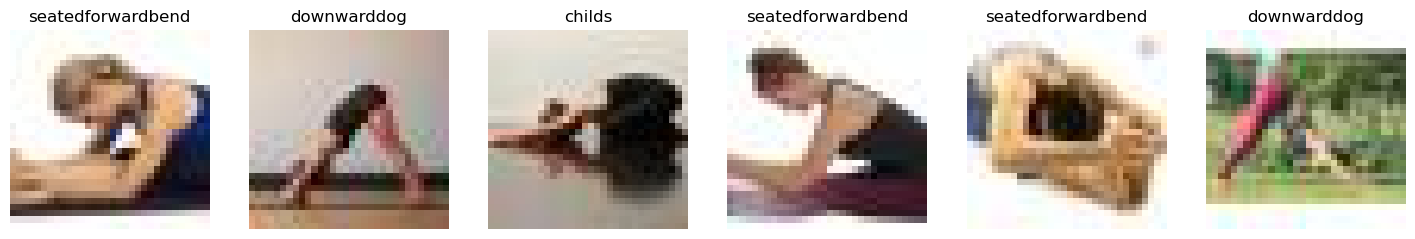

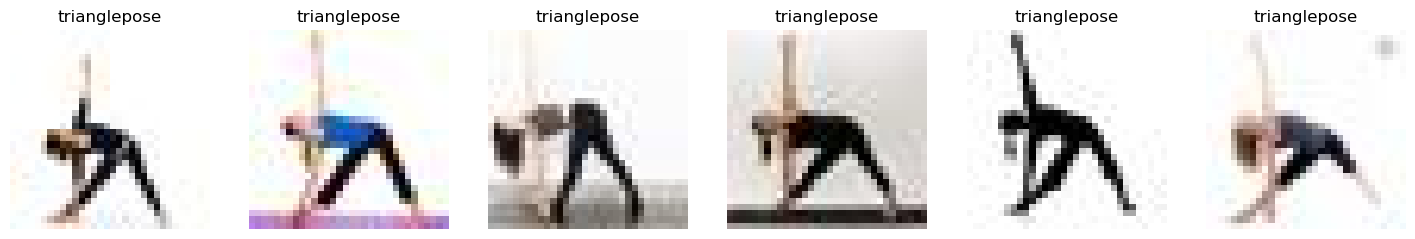

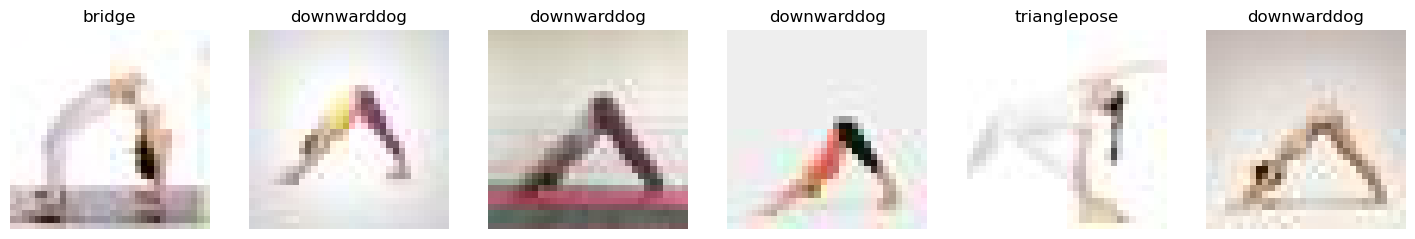

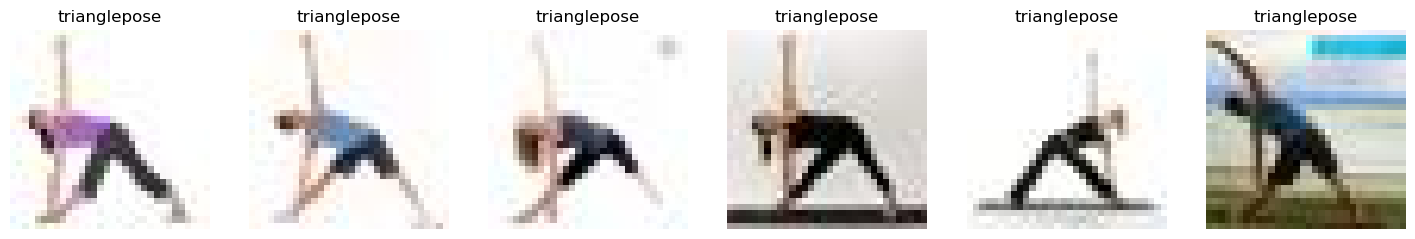

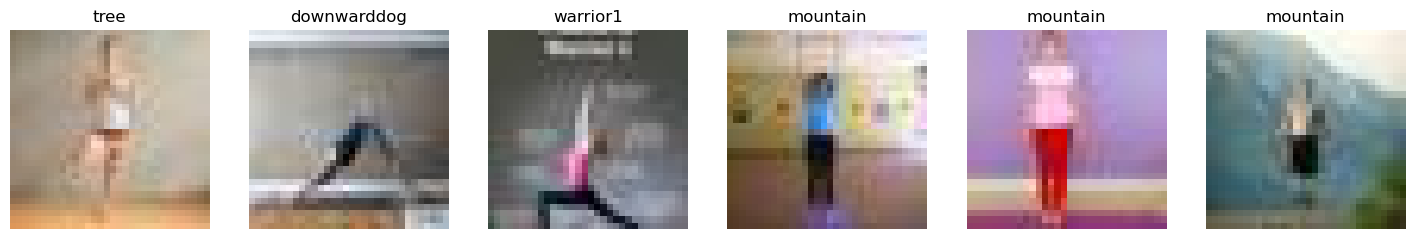

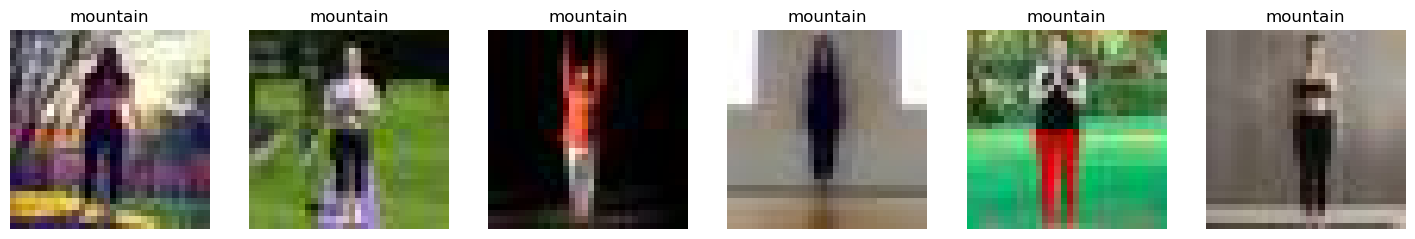

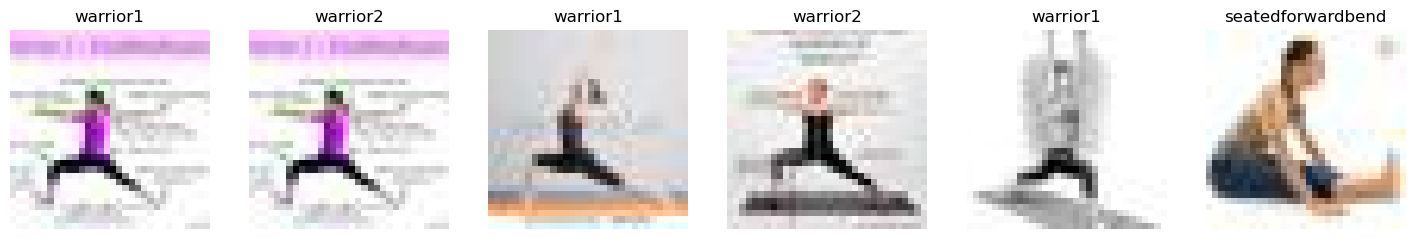

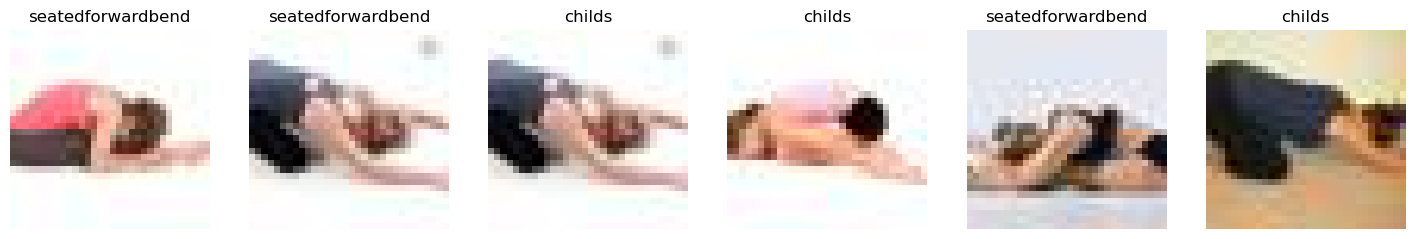

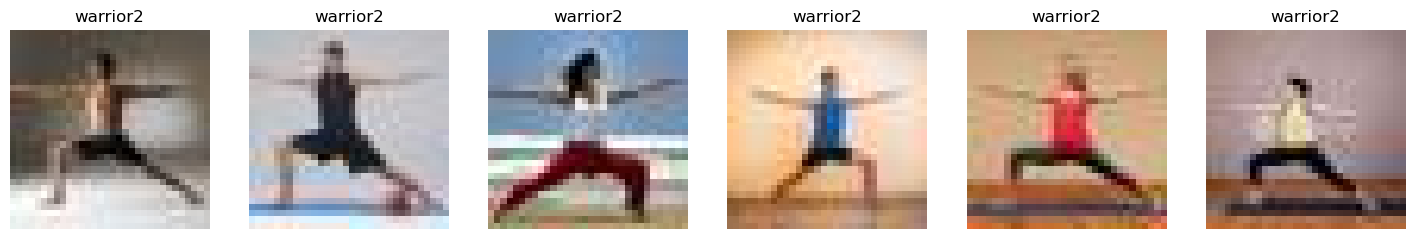

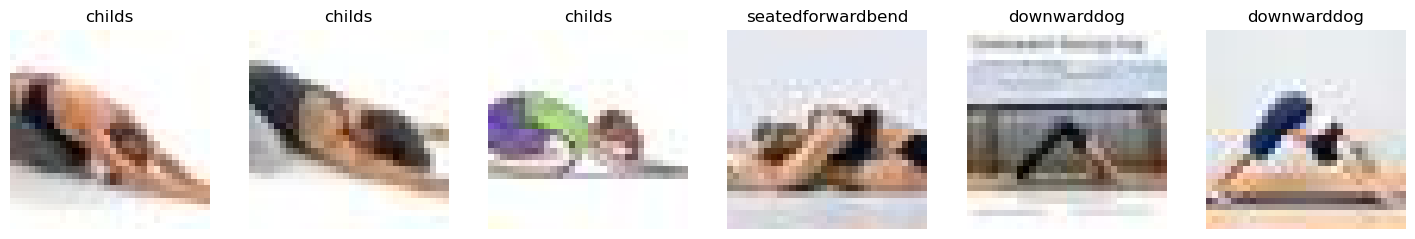

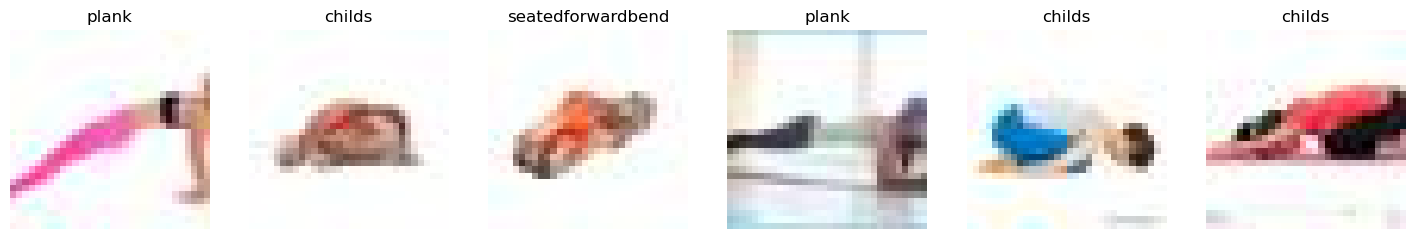

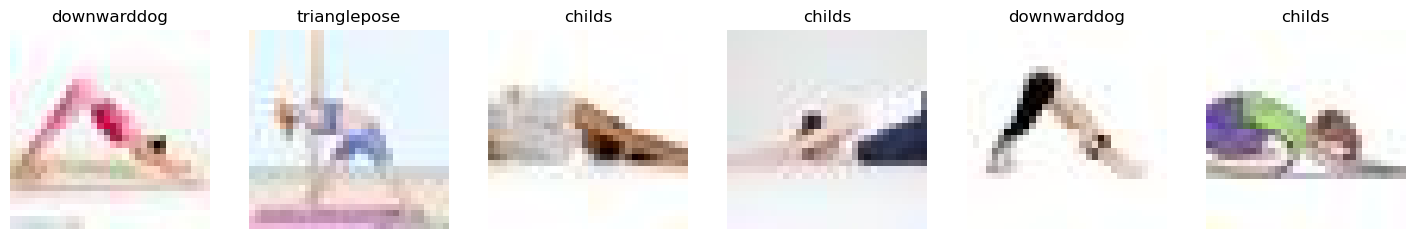

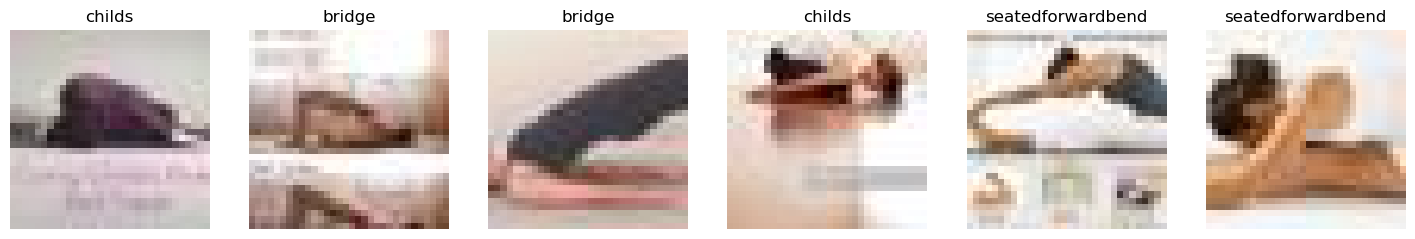

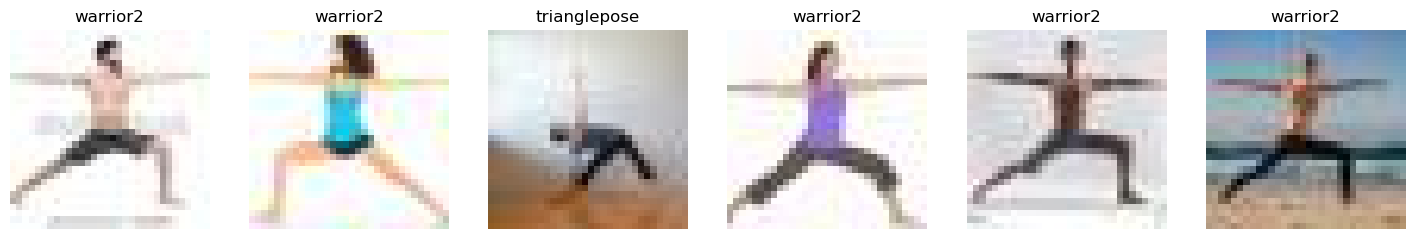

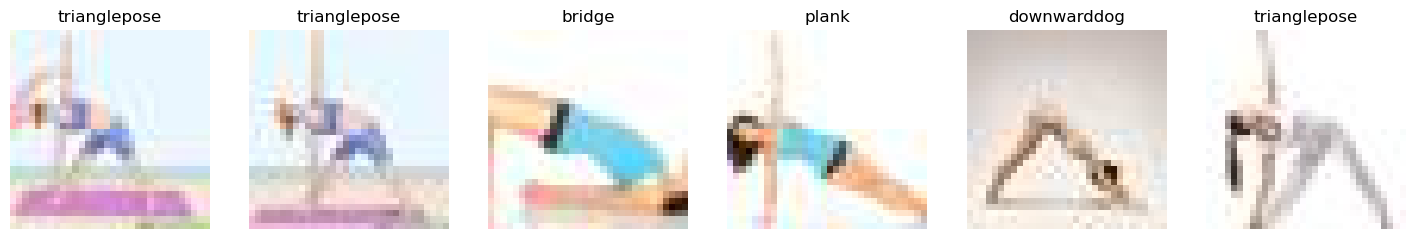

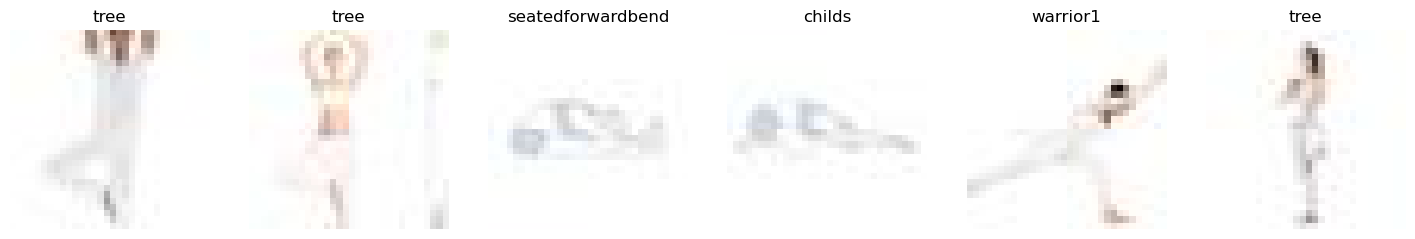

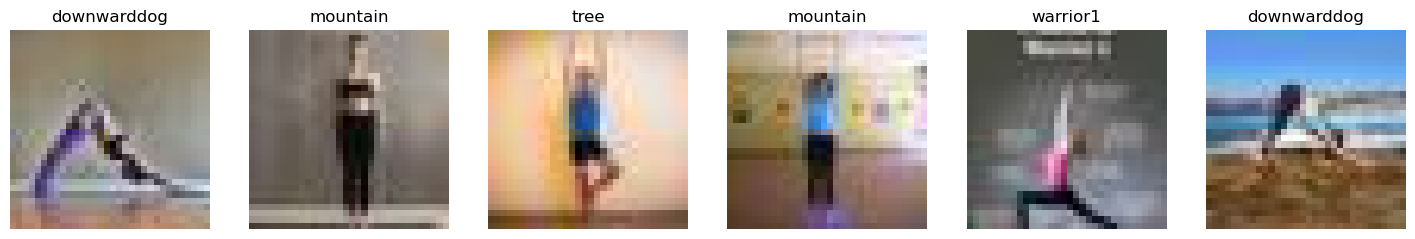

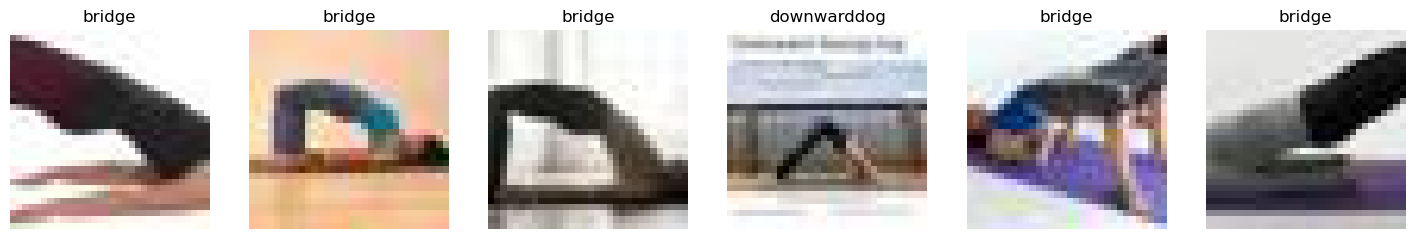

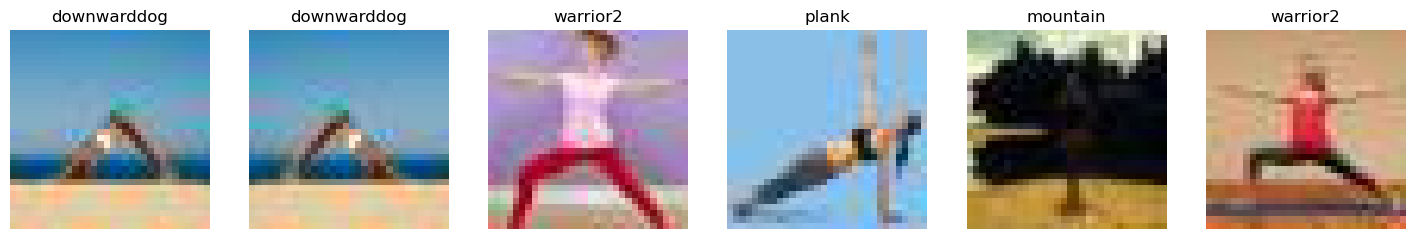

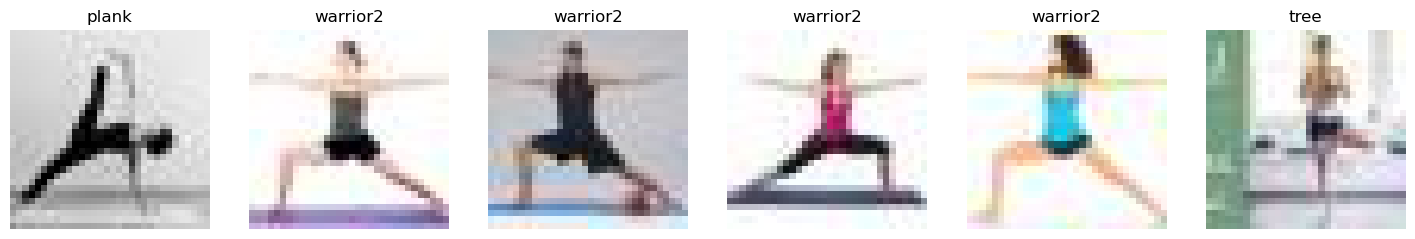

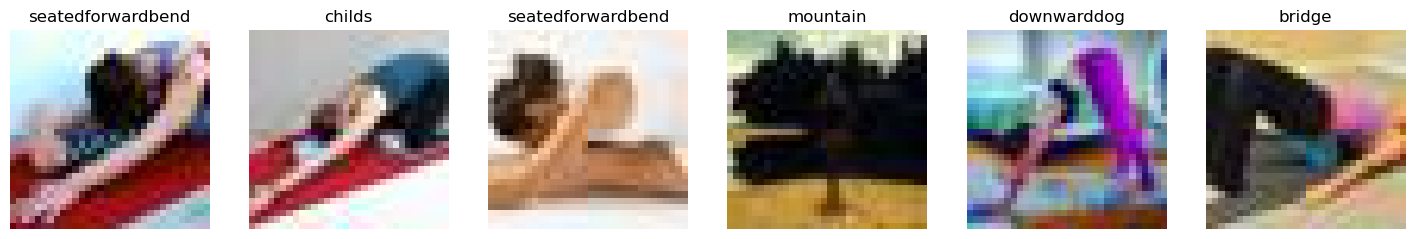

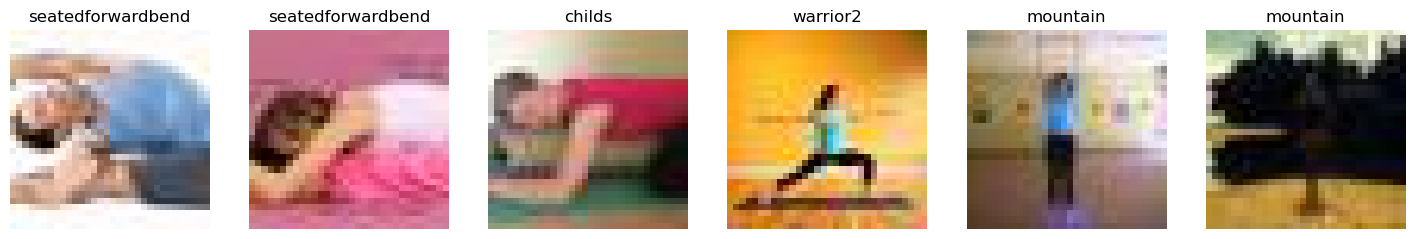

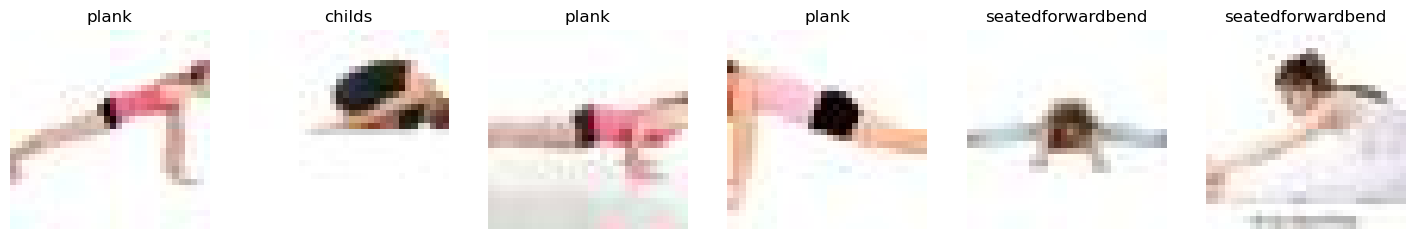

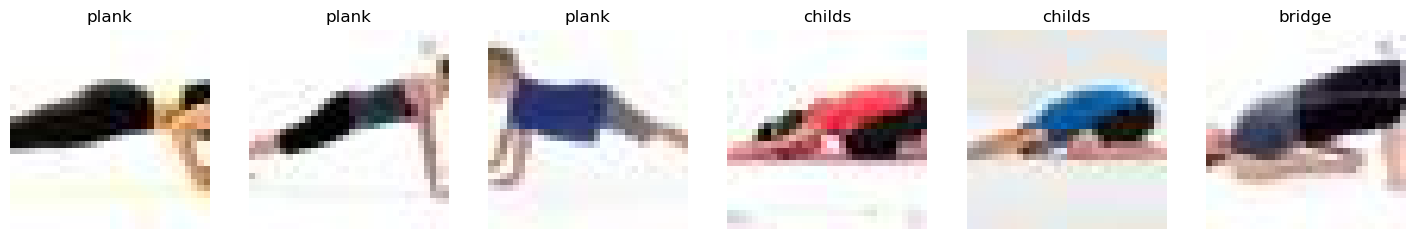

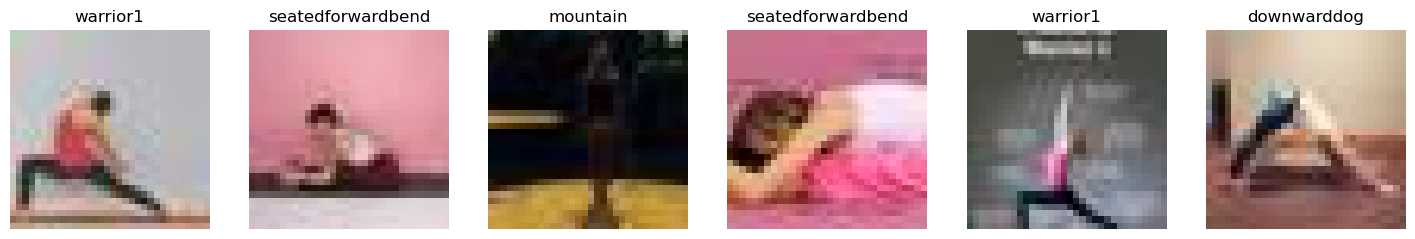

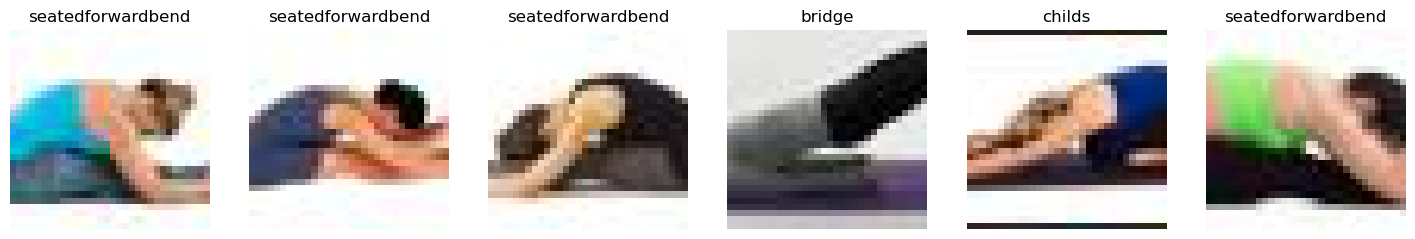

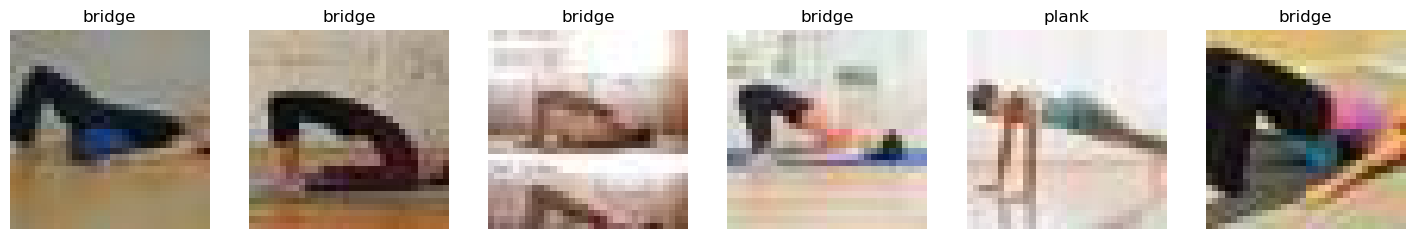

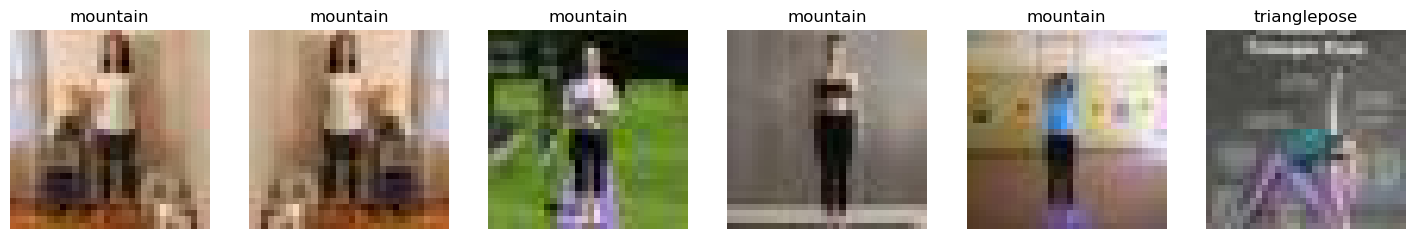

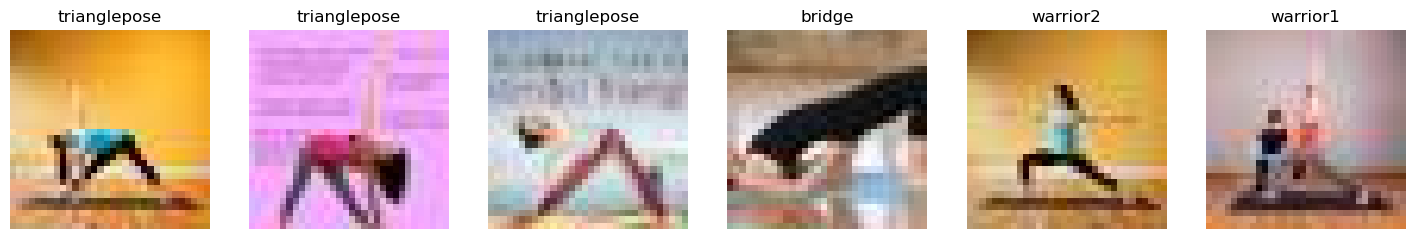

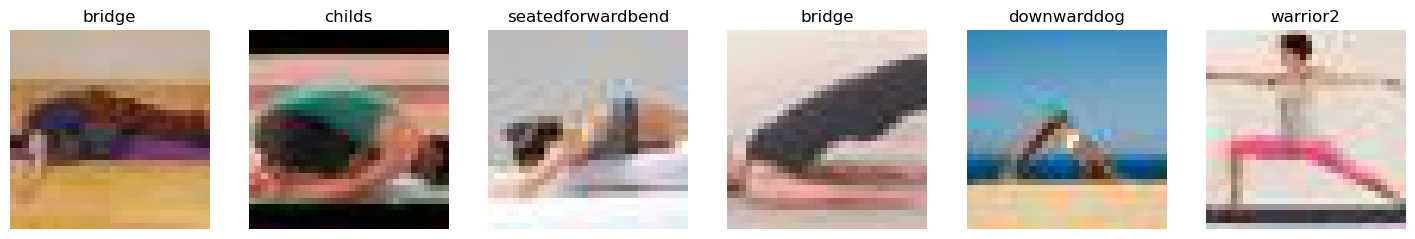

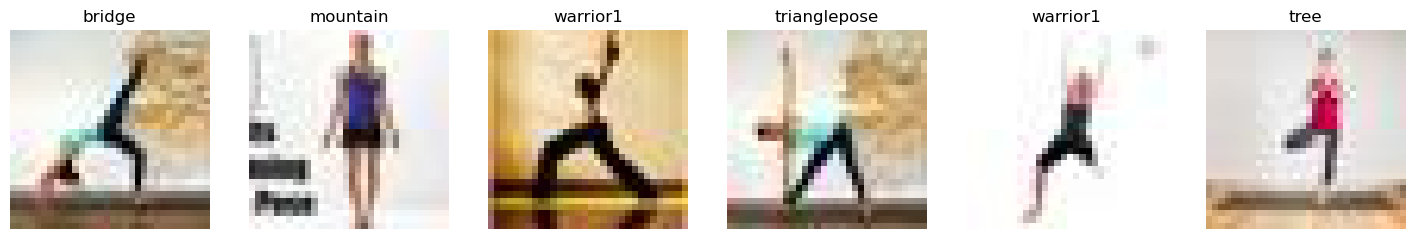

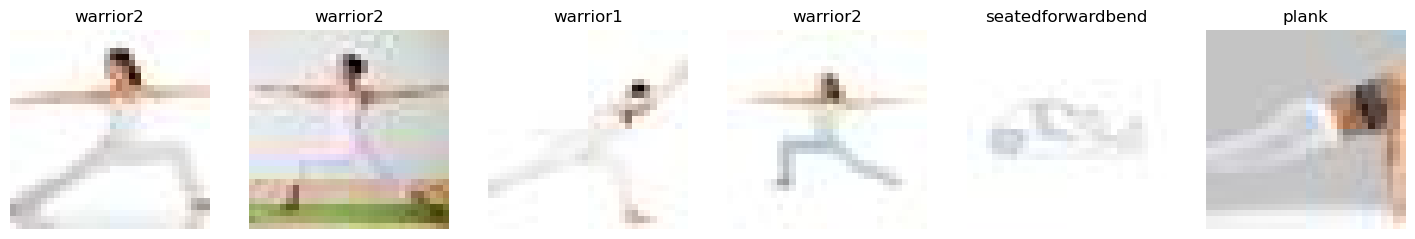

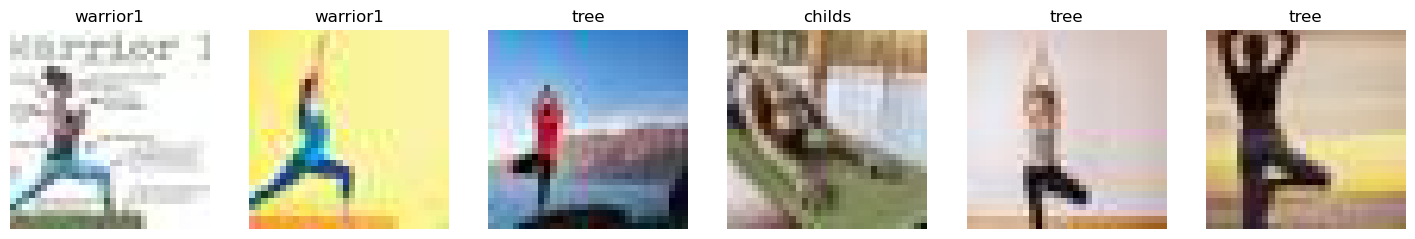

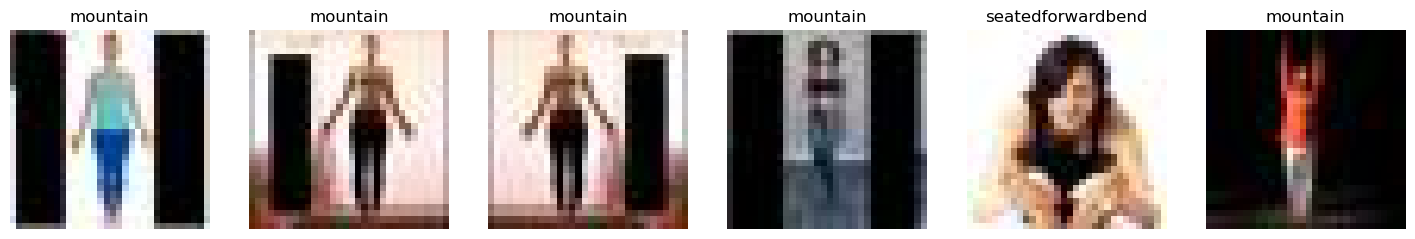

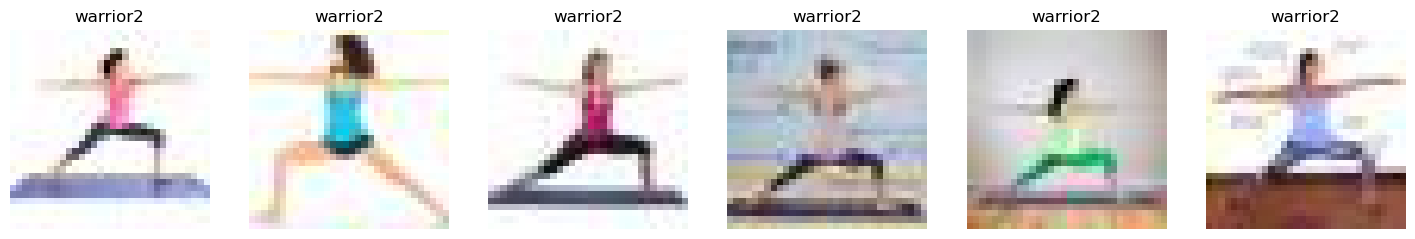

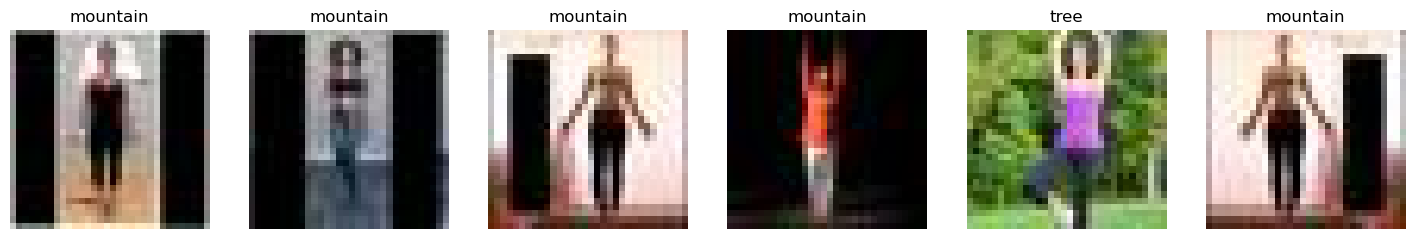

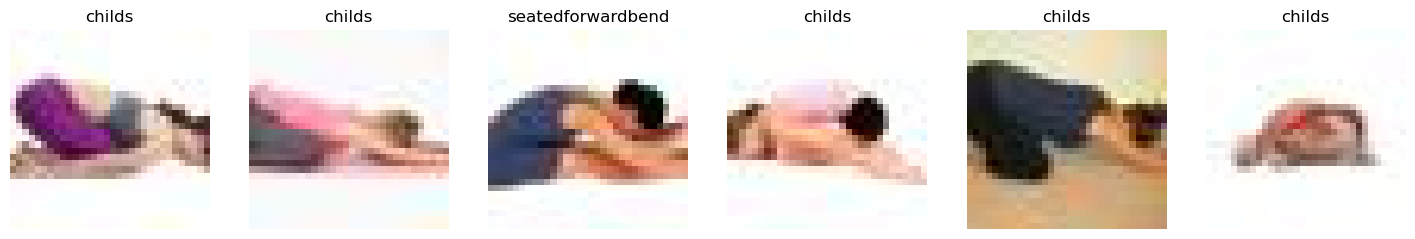

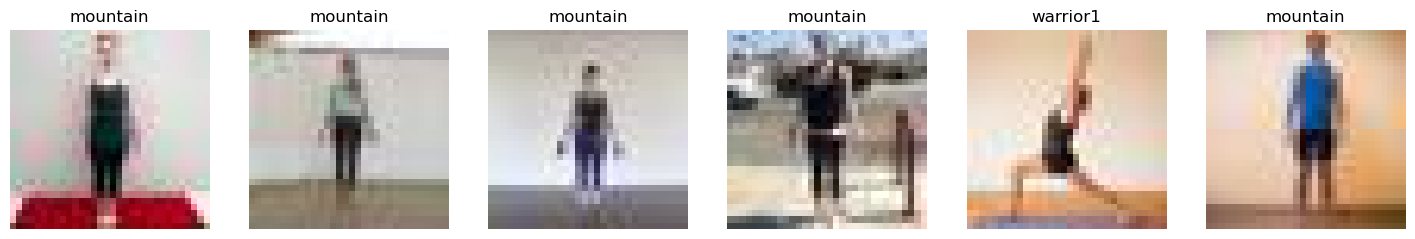

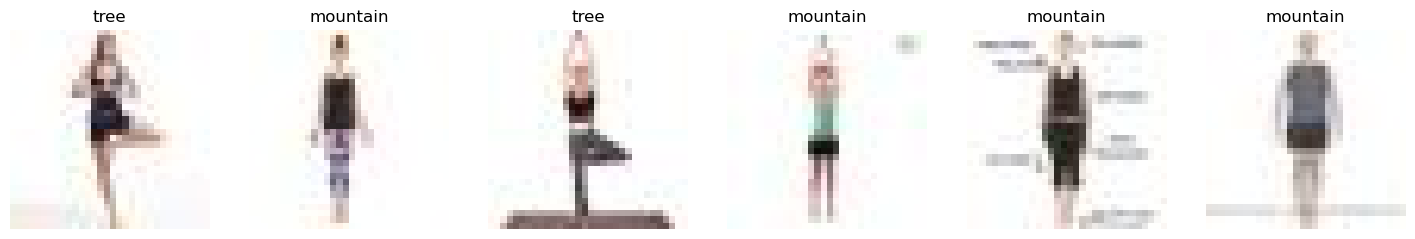

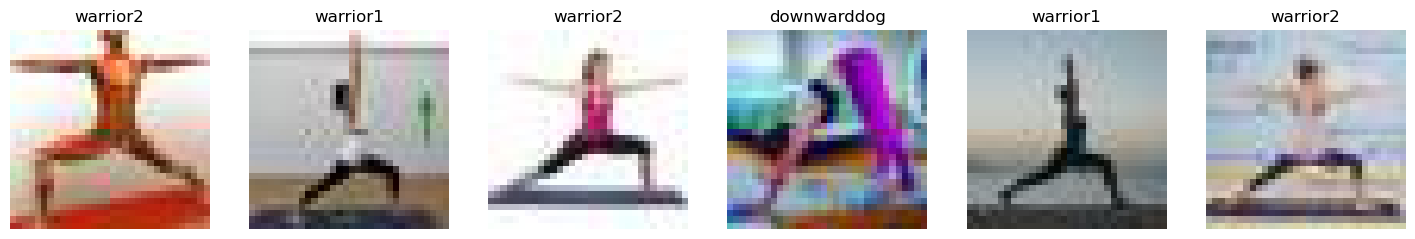

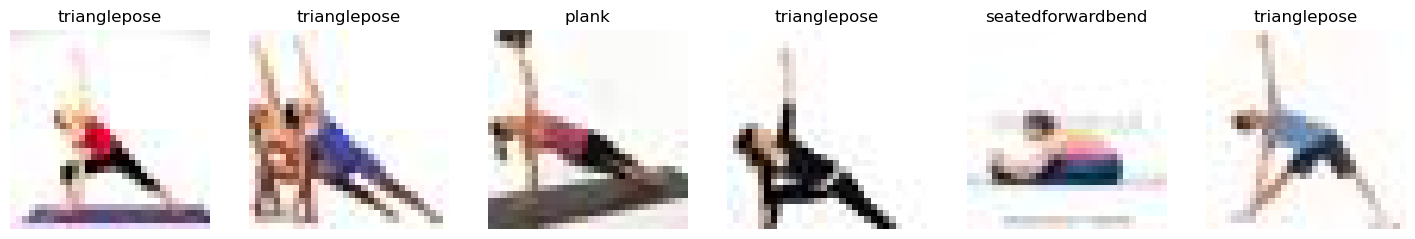

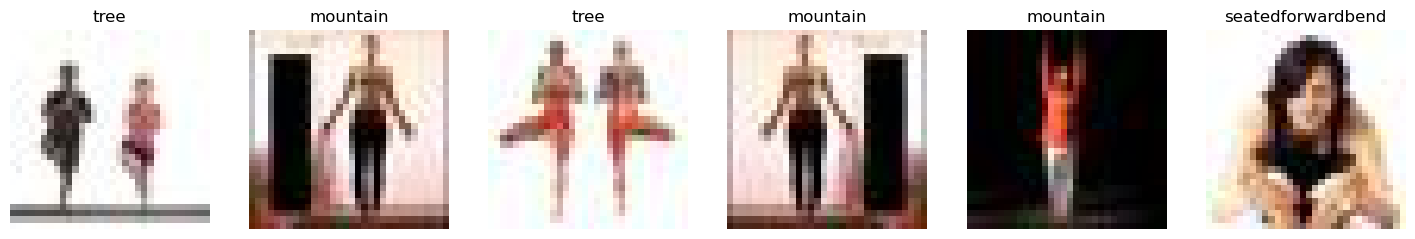

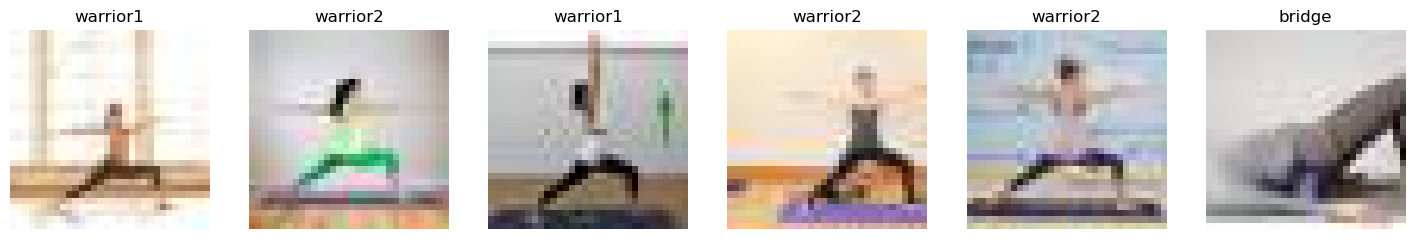

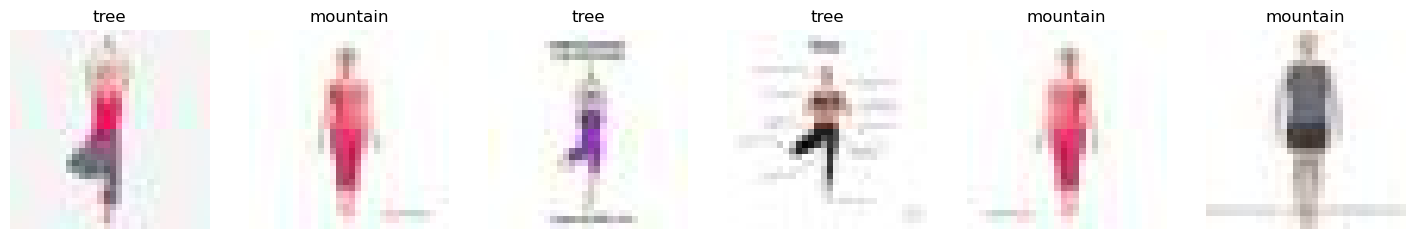

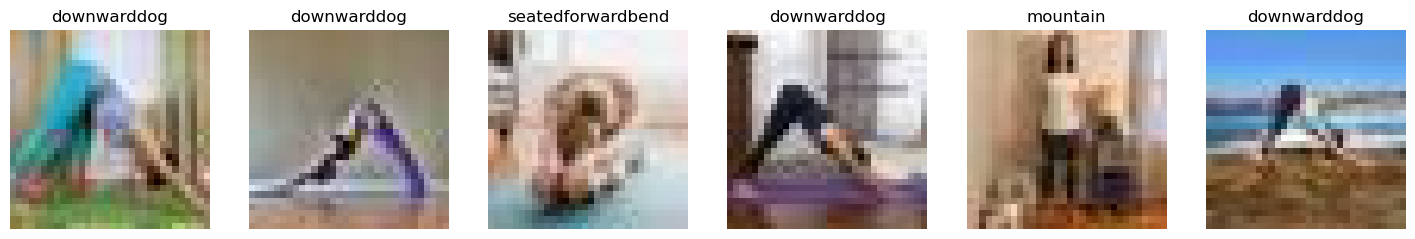

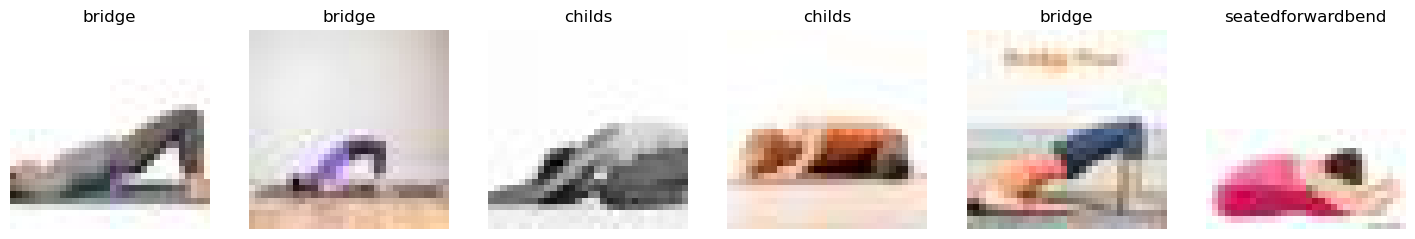

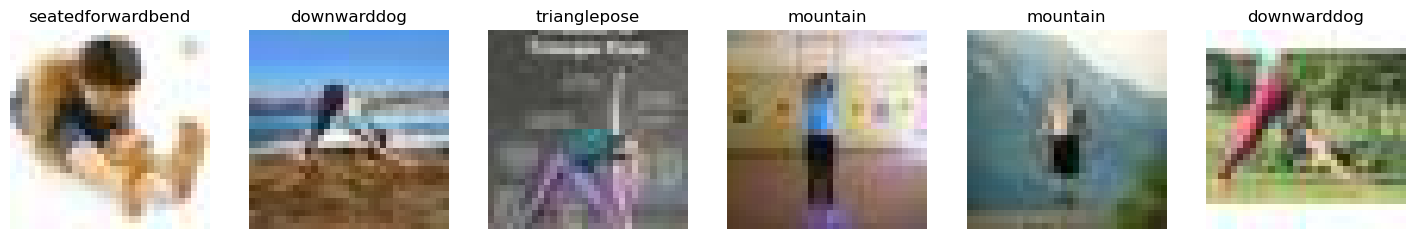

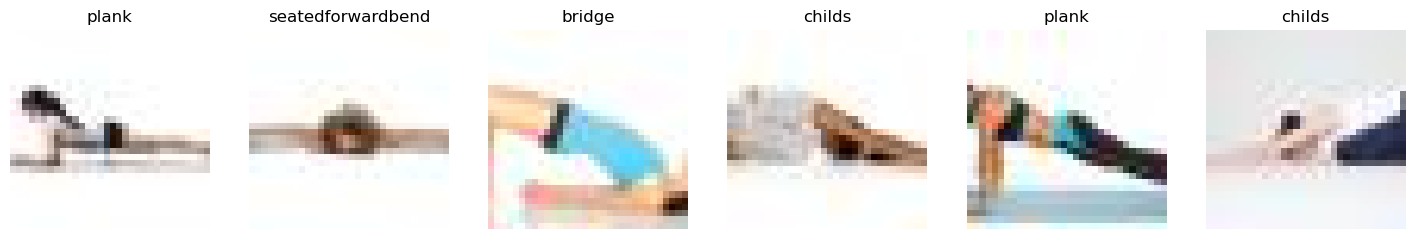

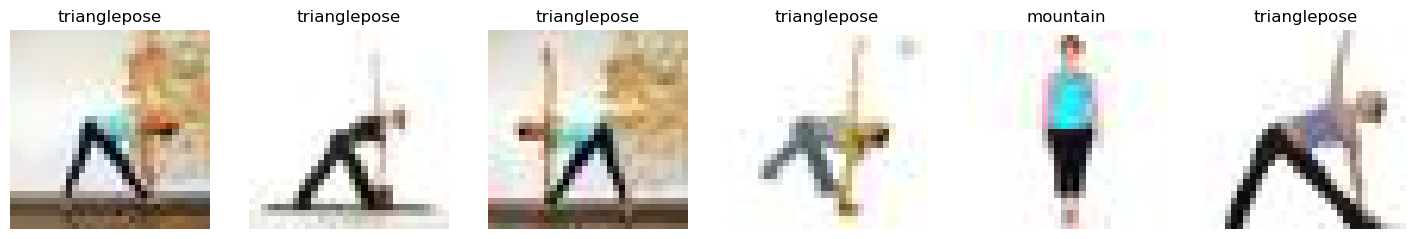

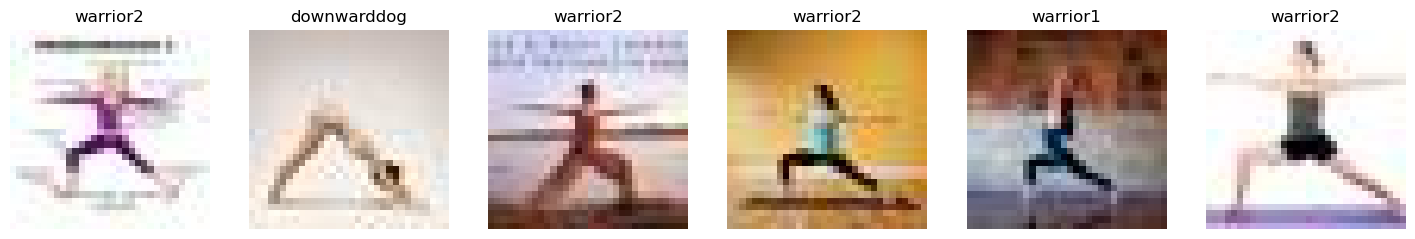

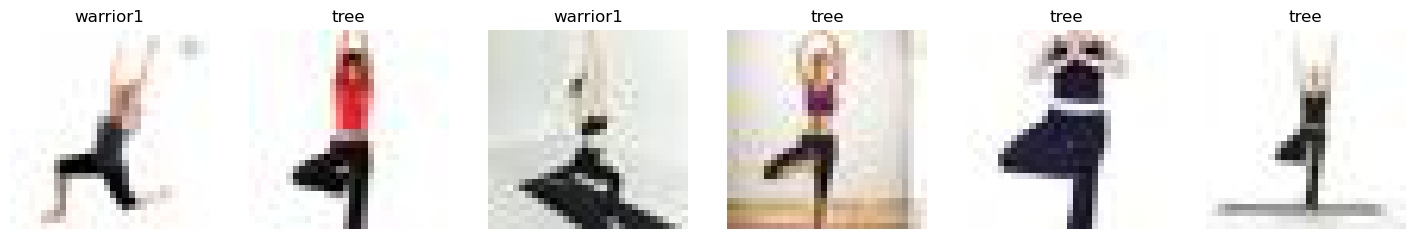

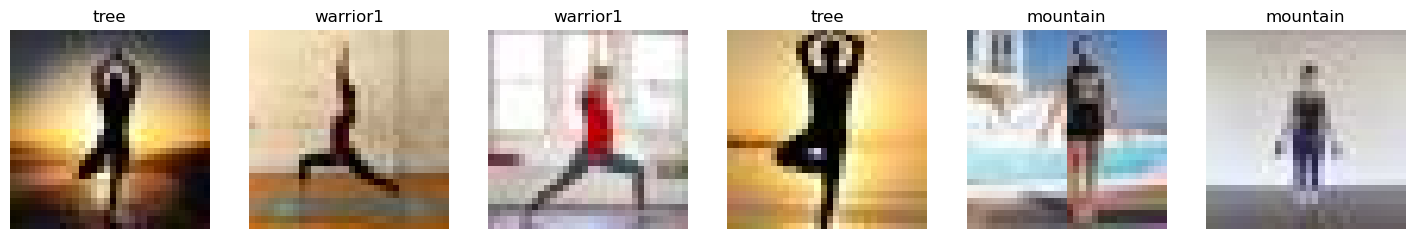

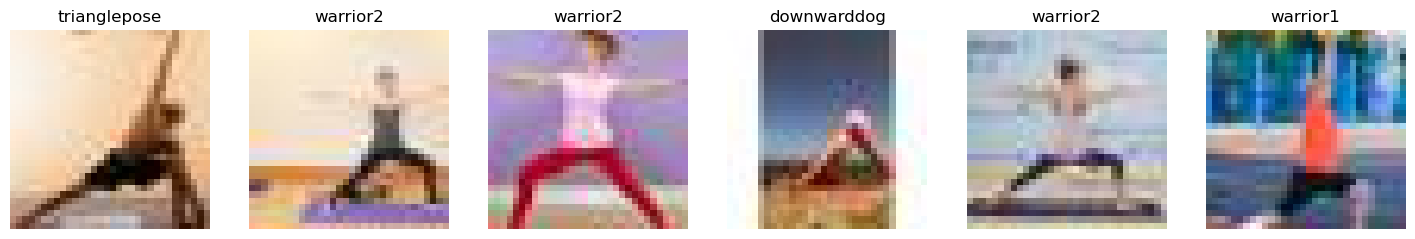

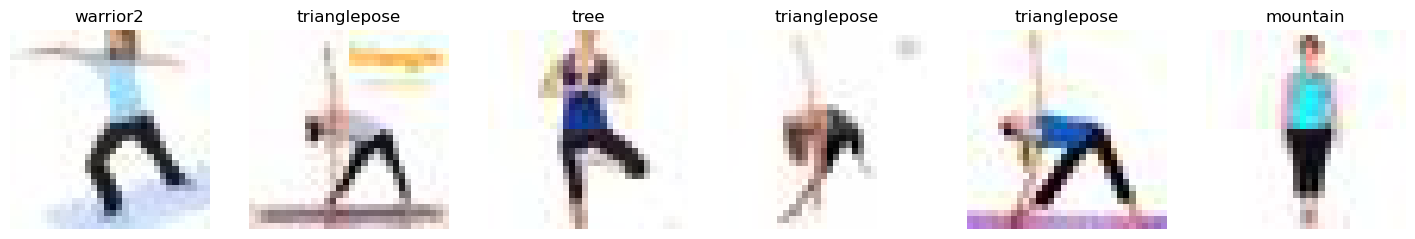

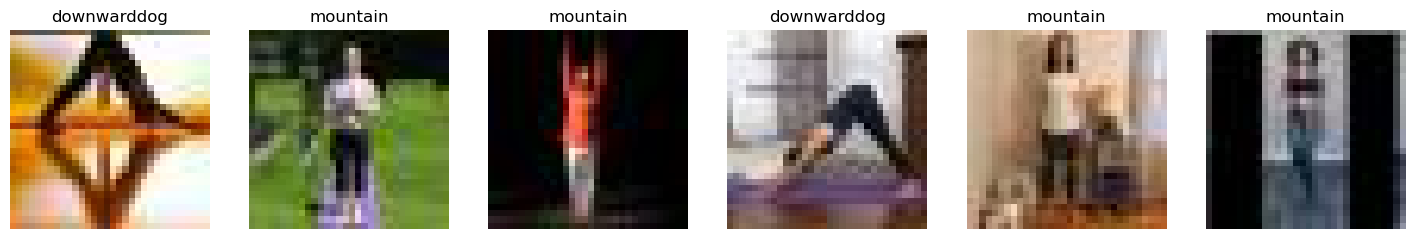

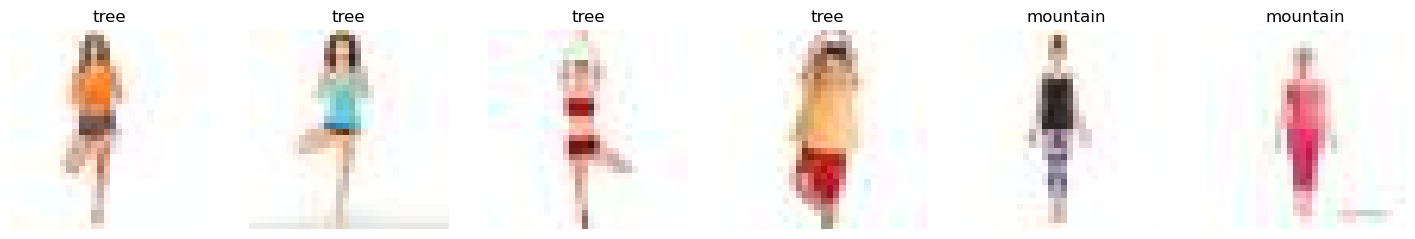

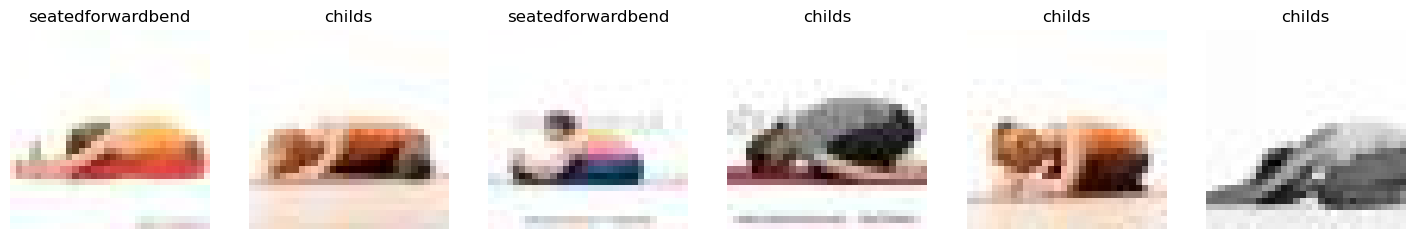

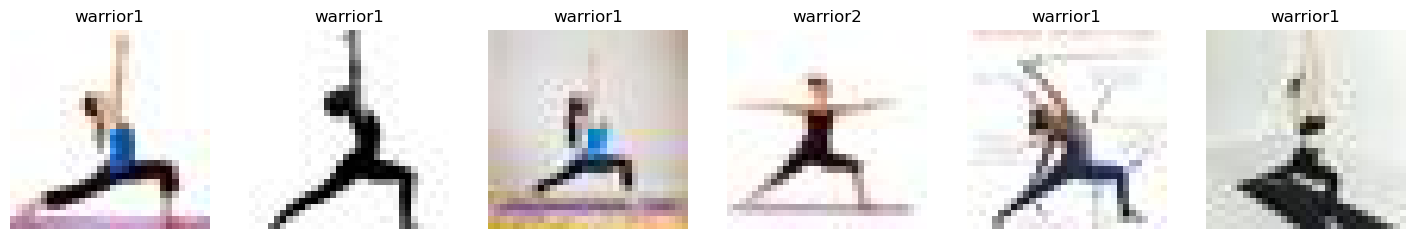

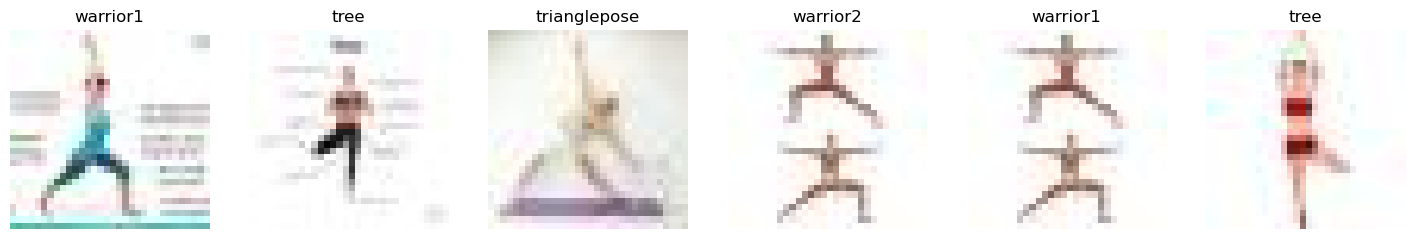

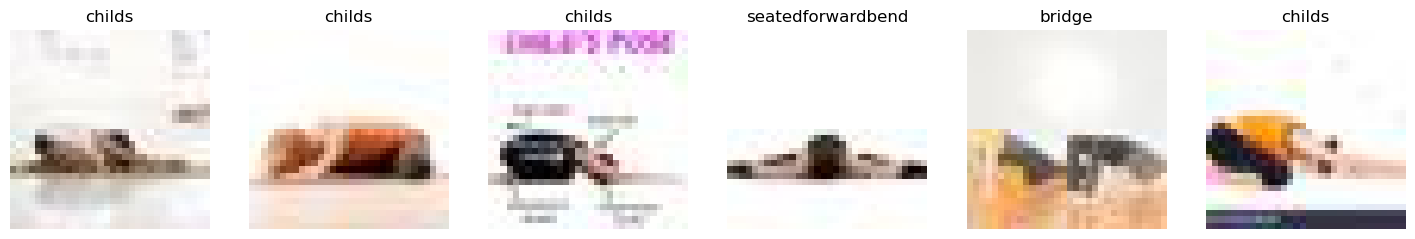

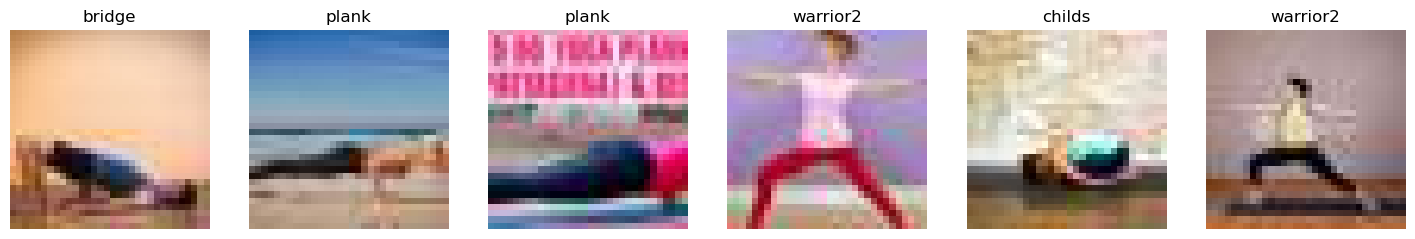

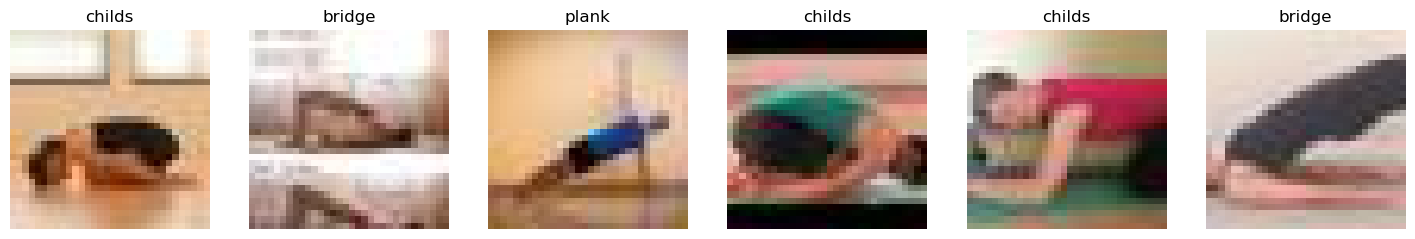

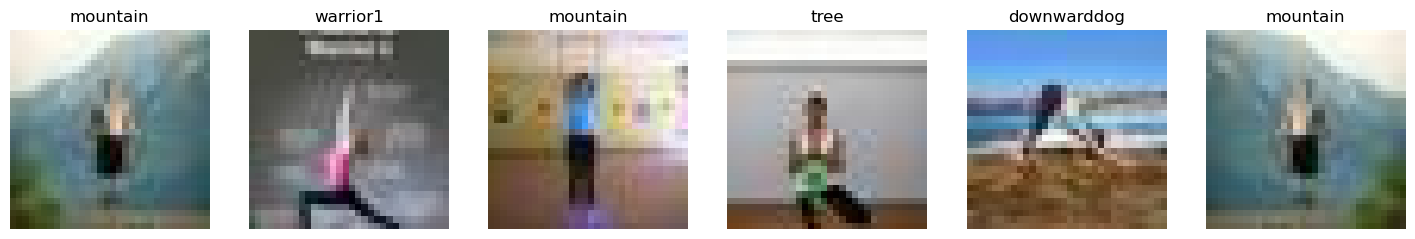

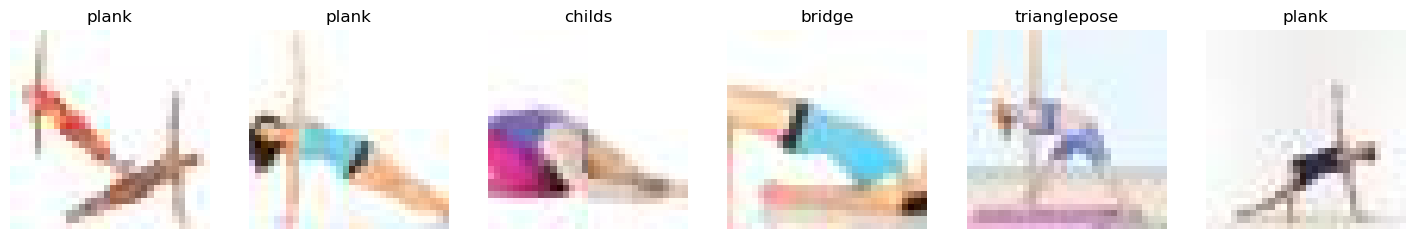

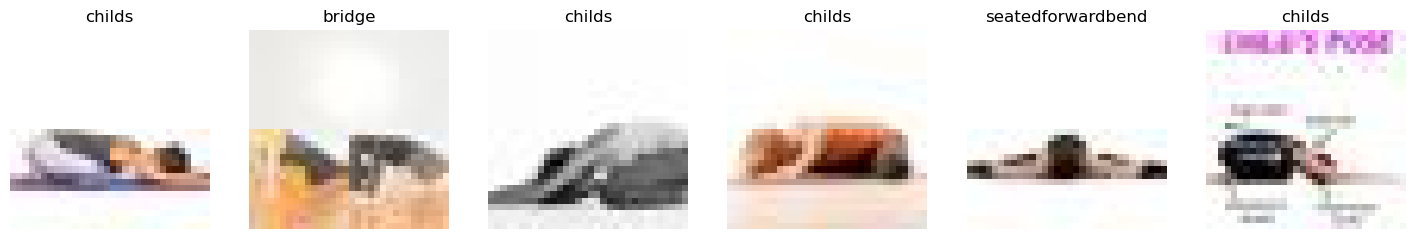

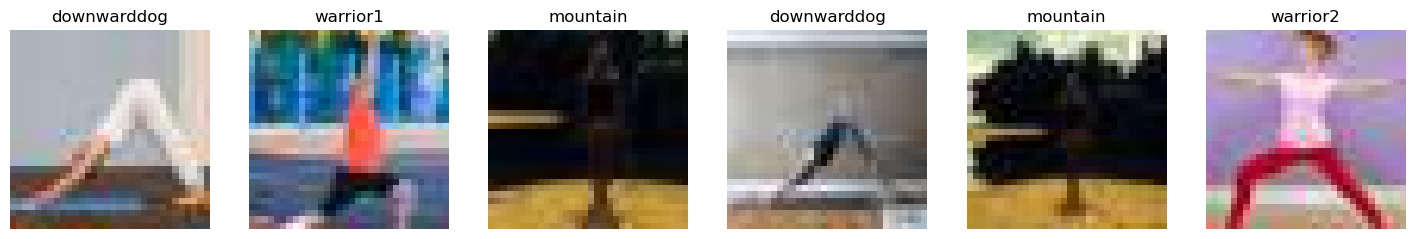

In [197]:
# plot the images
for i in range(len(result)):
    plt.subplots(figsize=(18, 18)) 
    plt.subplot(1,6,1)
    plt.imshow(x_test[i][0].numpy().astype("uint8"))
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')
    for j in range(len(result[i])):
        plt.subplot(1,6,j+2)
        plt.imshow(x_train[result[i][j]][0].numpy().astype("uint8"))
        plt.title(class_names[y_train[result[i][j]][0]])
        plt.axis('off')